In [23]:
import pandas as pd
import seaborn as sns
import sweetviz as sv


#Load csv data
with open('car_data.csv', 'r', errors='ignore') as car_data:
    df = pd.read_csv(car_data)

# Split the Car Name column out.
df[['Year', 'Make', 'Model']] = df['Car Name'].str.extract(r'(\d+)\s+(\w+)\s+(.*)')



#Remove non-numeric chracters
df['Car Mileage'] = df['Car Mileage'].str.replace('[^\d]+', '')
df['Car Price'] = df['Car Price'].str.replace('[^\d]+', '')
df['Year'] = df['Year'].str.replace('[^\d]+', '')

#Convert Mileage, Price and Year to a number.
df[['Car Mileage', 'Car Price','Year']] = df[['Car Mileage', 'Car Price','Year']].apply(pd.to_numeric)

# Filter out rows with incorrect year values.
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2024)]

# Fill missing values
df = df.dropna(subset=['Car Price', 'Car Mileage', 'Year'])

# Fill other missing values with 'Unknown'
for column in ['Exterior Color', 'Interior Color', 'Drivetrain', 'Fuel Type', 'Transmission', 'Engine']:
    df[column] = df[column].fillna('Unknown')

# Convert categorical variables into integers
categorical_features = ['Exterior Color', 'Interior Color', 'Drivetrain', 'Fuel Type', 'Transmission', 'Engine']
onehot_features = ['Car Name']

# Define a transformer for the OneHotEncoder and the LabelEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_features),
        ('label', LabelEncoder(), categorical_features)])



C:\Users\Dalton\AppData\Local\Temp\ipykernel_30248\446726668.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Car Mileage'] = df['Car Mileage'].str.replace('[^\d]+', '')
C:\Users\Dalton\AppData\Local\Temp\ipykernel_30248\446726668.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Car Price'] = df['Car Price'].str.replace('[^\d]+', '')
C:\Users\Dalton\AppData\Local\Temp\ipykernel_30248\446726668.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace('[^\d]+', '')


In [ ]:
my_report = sv.analyze(df)
my_report.show_html()

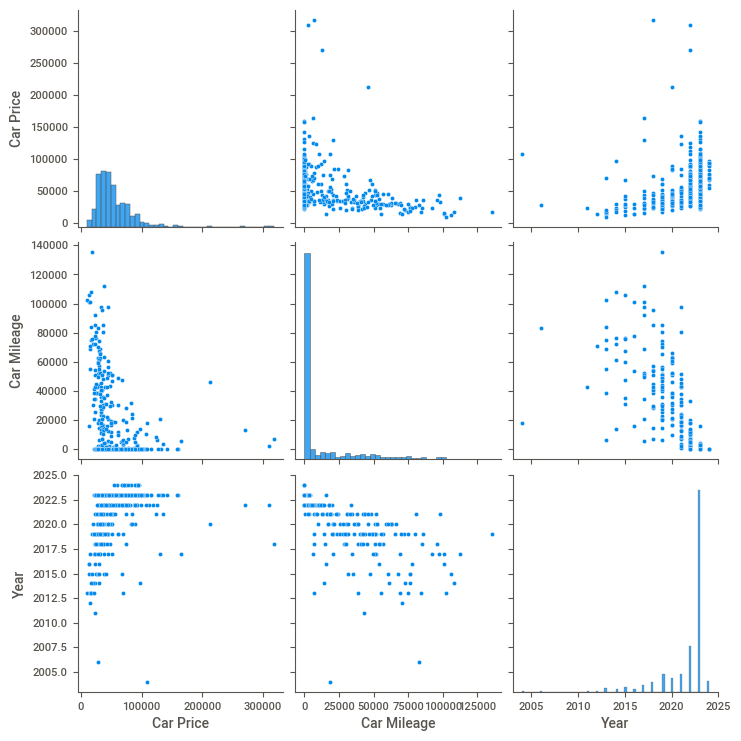

In [13]:
import seaborn as sns
sns.pairplot(df)